In [38]:
# load and optionally install required packages
if (!require('pacman')) install.packages('pacman')
pacman::p_load(
    dplyr,
    readr,
    ggplot2,
    lubridate,
    scales,
    rjson
)


The downloaded binary packages are in
	/var/folders/3l/l6pj_mwn0hd_47qlm6q6mb0c0000gn/T//RtmphAihoC/downloaded_packages



rjson installed



In [2]:
data <- read_csv('./data/generated/debotted_combined.csv')

Rows: 558120 Columns: 51
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (31): content, domain_url, images.url, lang, matched_profile, noise_cate...
dbl (19): engagement, fluency_level, porn_level, reach, sentiment, url_views...
lgl  (1): title

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [40]:
data.published <- data %>%
select(published) %>%
mutate(
    published = substr(published, 1, 8)# %>% as.Date()
)

In [41]:
data.frequency = data.published %>%
group_by(published) %>%
summarise(frequency = sum(published != 0))

In [42]:
data.frequency %>% toJSON() %>% write('./data/generated/frequency_distinct.json');

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


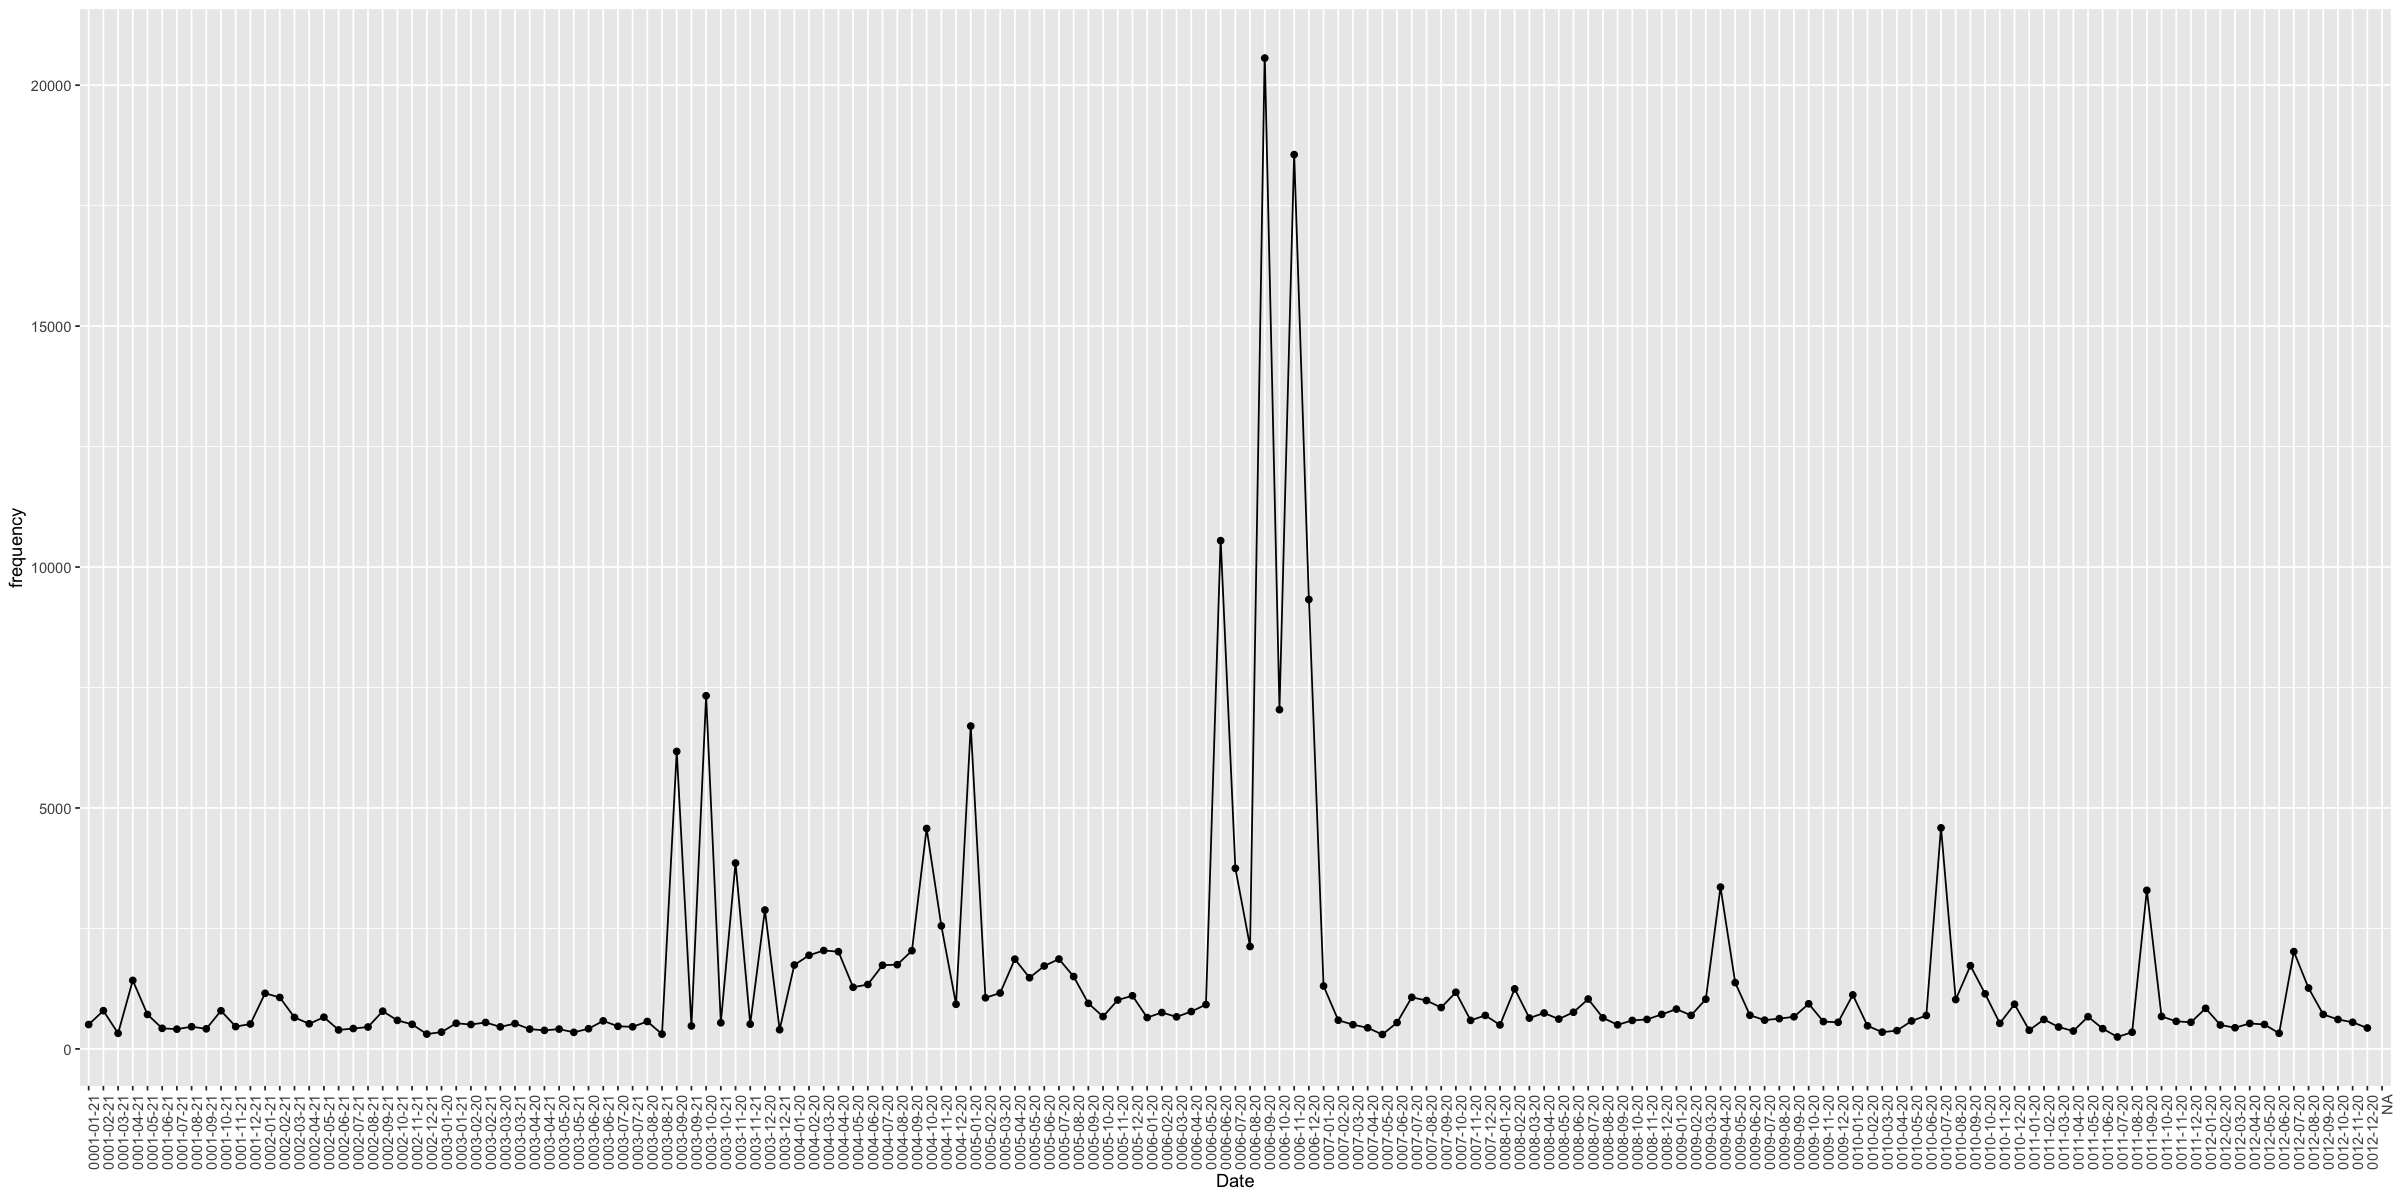

In [37]:
options(repr.plot.width = 20, repr.plot.height = 10)

data.frequency %>%
ggplot(aes(x=factor(published), y=frequency, group=1)) +
geom_line() +
geom_point() +
theme(axis.text.x = element_text(angle = 90, hjust=1)) +
xlab('Date')